Investigating Fandango Movie Ratings

In 2015, Walt Hickey revealed that Fandango has a tendency to inflate ratings to the higher 0.5, i.e. a 2.7 star rating will be reflected as a 3 star. The project looks to substantiate this claim made, and if the claim is still a current problem in Fandango's movie ratings. 

Below are two sets of data, fandango_score_compare being the data before the Hickey's revelation and movie_ratings_16_17 being the data after.

In [2]:
import pandas as pd
fandango_score_compare = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango_score_compare.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   
3     0.90           4.2         ...                2.70            1.0   
4     0.70           1.4         ...                2.55            0.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   
1                 4.0                    3.5                         4.0   
2                 4.5                    3.0                         4.0   
3                 4.0                    1.0                         2.5   
4                 1.5                    1.5                         1.5   

   IMDB_norm_round  Metacritic_user_vote_count  IMDB_user_vote_count  \
0              4.0                        1330                271107   
1              3.5                         249                 65709   
2              4.0                         627                103660   
3              2.5                          31                  3136   
4              2.5                          88                 19560   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

[5 rows x 22 columns]

In [4]:
movie_ratings_16_17.head()

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

Both looks at movies at the period we are interested in comparing.

However which are popular or received more reviews. Fandango_score_compare picks movies with at least 30 reviews and are dated 24 August 2015. Movie_ratings_16_17 picks 214 of the most popular movies released in 2016 and 2017.

Thus it is likely that such movies will be more highly rated (or advertised). Samples are not entirely random. 

We filter related data as below:

In [6]:
fandango_before = fandango_score_compare[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes','Fandango_Difference']].copy()
fandango_after = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()
fandango_before.head()

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [8]:
fandango_after.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

The data at hand require a new angle of analysis or getting of new data. As both data are affected by general popularity, we could analyse if there is a change in how Fandango rates popular movies before and after Hickey's article.

We are therefore comparing:
1) Fandango's rating for movies in 2015
2) Fandango's rating for movies in 2016

Where, as a definition for popular movie: reviews from at least 30 people. In order to check if the data from fandango_after has at least 30 reviews, a sample of 10 is selected for manual checking on Fandango's website. Ideally 8 of 10 has more than 30 reviews.

In [9]:
fandango_after.sample(10, random_state=1)

movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5

PER SOLUTION:
Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying to get a favorable sample.

As of April 2018, these are the fan ratings we found:

Mechanic: Resurrection- 2247
Warcraft- 7271
Max Steel- 493
Me Before You- 5263
Fantastic Beasts and Where to Find Them	- 13400
Cell- 17
Genius- 127
Sully- 11877
A Hologram for the King-	500
Captain America: Civil War- 35057

9 of the 10 movies in our sample are popular. 

Let's also double-check the other data set for popular movies. The documentation states clearly that there're only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here.

In [12]:
sum(fandango_score_compare['Fandango_votes'] < 30)

0

Further filter data for movies produced only in 2015 and 2016.

In [14]:
fandango_before.head(3)

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5

There are no year column, but we can extract the year from 'FILM' string.

In [15]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [18]:
fandango_2015 = fandango_before[fandango_before['Year']=='2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [19]:
fandango_after.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

In [20]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [22]:
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

COMPARING THE DISTRIBUTION OF MOVIE RATINGS BETWEEN 2015 AND 2016

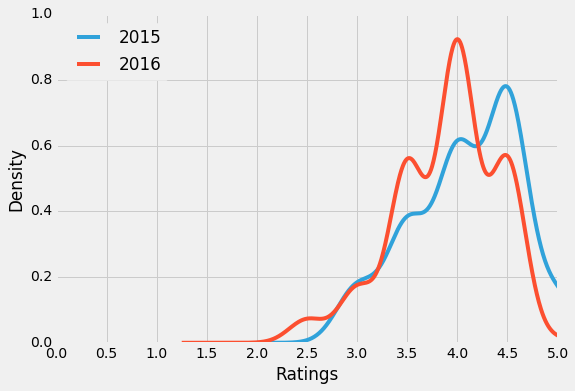

In [27]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend= True, figsize=(8,5.5))
fandango_2016['fandango'].plot.kde(label= '2016', legend= True)
plt.xticks(arange(0,5.1,0.5))
plt.xlim(0,5)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

The graph is left-skewed and tends to higher ratings. This could be due to the fact we are mainly using data on popular movies and usually good movies get shared through social media and word-of-mouth.

However, most ratings dropped from 4.5 in 2015 to 4.0 in 2016. There seems to be a more sensitive rounding between the range of 3.5 to 4.5, most figures landed in 4.0 in 2016.

Ratings for 2016 are indeed lower compared to 2015.

COMPARING RELATIVE FREQUENCIES

In [30]:
print ('2015'+ '\n' + '-' *20)
fandango_2015['Fandango_Stars'].value_counts()

2015
--------------------


4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [31]:
print ('2016'+ '\n' + '-' *20)
fandango_2016['fandango'].value_counts()

2016
--------------------


4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

The frequency tables still shows that majority of ratings in 2015 (4.5 stars) are higher than that in 2016 (4.0 stars). There is also a lower minimum score of 2.5 in 2016, an obvious downward trend in ratings. The direction is not as clear as the plot before.

In [39]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]#this is different, note

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index=('mean', 'median', 'mode')
summary

2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

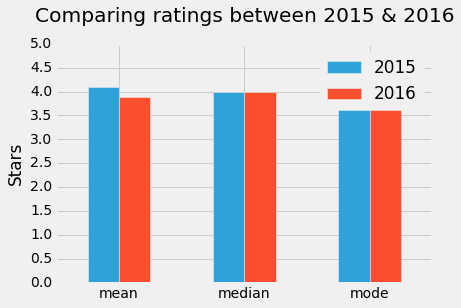

In [48]:
summary.plot.bar()
plt.title('Comparing ratings between 2015 & 2016', y=1.07)
plt.ylim(0,5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.xticks(rotation=360)

In [49]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

CONCLUSION

There is certainly a difference in how Fandango rated popular movies in 2015 compared to 2016. The cause is 